In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.modelling.fault.fault_function import BaseFault
from LoopStructural.visualisation import LavaVuModelViewer, MapView
from LoopStructural.utils import process_map2loop
import pandas as pd
import numpy as np
import os

In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lgrose/

## Create a model from map2loop
[map2loop](https://github.com/Loop3D/map2loop) is a map deconstruction library to provide inputs to [Loop](Loop3d.org). The development of map2loop is lead by Mark Jessell at The University of Western Australia. 

###  What it does:
Combines information extracted from vector geology maps in various forms to support 3D geological modelling. Outputs are simple csv files that should be readable by any 3D modelling system. In the following demonstration we will use LoopStructural to generate a 3D model automatically from a map2loop output. 

In [5]:
fault_params = {'interpolatortype':'FDI',
                'nelements':1e4, #number of elements to model fault with
                'data_region':.5, #buffer around fault volume
                'solver':'pyamg', #how to solve least squares system, pyamg is an algorithmic multigrid solver
               }

foliation_params = {'nelements':1e5,# how many tetras/voxels
                    'interpolatortype':'PLI',
                    'buffer':.5,  # how much to extend nterpolation around box np.array([1000,1000,1000]),#
                    'solver':'pyamg',
                    'damp':True,
                   }

model, m2l_data = GeologicalModel.from_map2loop_directory('./data/scratch/',#'/home/lgrose/dev/python/map2loop/Turner_Syncline/',
                                                          skip_faults=False,
                                                          fault_params=fault_params,
#                                                           unconformities=False,
                                                          rescale=True,
                                                          foliation_params=foliation_params)



## Fault network
The following figure shows the fault displacement magnitude within the model area. Fault displacements are estimated from map2loop and geometry is constrained by the map2loop process, the faults are assumed to be vertical with vertical displacement vectors.  

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:68: RuntimeWarning: invalid value encountered in greater
  r[v > 0] = self.positive(v[v > 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:69: RuntimeWarning: invalid value encountered in less
  r[v < 0] = self.negative(v[v < 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:48: RuntimeWarning: invalid value encountered in greater
  eva[v > self.max_v] = self.w[0] * self.max_v ** 3 + \
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:51: RuntimeWarning: invalid value encountered in less
  eva[v < self.min_v] = self

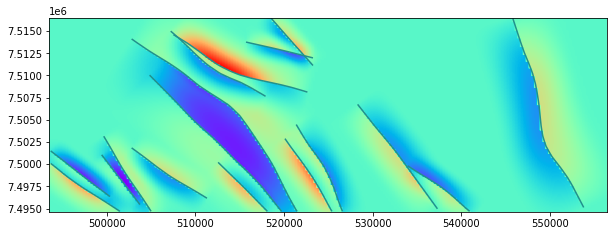

In [27]:
mapview = MapView(model)
mapview.nsteps = (200,200)
mapview.add_fault_displacements()
mapview.add_faults()

# for i in range(5):
#     def mask(x):
#         val = model.features[i].displacementfeature.evaluate_value(x)
#         val[np.isnan(val)] = 0
#         maskv = np.zeros(val.shape).astype(bool)
# #         maskv[~np.isnan(val)][np.abs(val[~np.isnan(val)]) > 0.001] = 1
#         maskv[np.abs(val) > 0.001] = 1
# #         maskv = lambda x : np.abs() > 0.01
#         return maskv
# #     mask = lambda x : np.abs(model.features[i].displacementfeature.evaluate_value(x)) > 0.0001
#     mapview.add_contour(model.features[i],0,mask=mask)

## Visualise 3D block diagram and boundary surfaces
A stratigraphic column is generated from the map2loop input data that is populated with the colours from the geological map. 


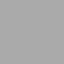

In [7]:
# %%notify
view = LavaVuModelViewer(model,vertical_exaggeration=1)
view.nelements=1e6
view.add_model()
view.nelements=1e5
view.add_model_surfaces()
view.interactive()

### Plot on a map surface
We can also add the model to a 2D map (using a z value of 0, although this can be varied by adding `z` as an argument to the `add_model`

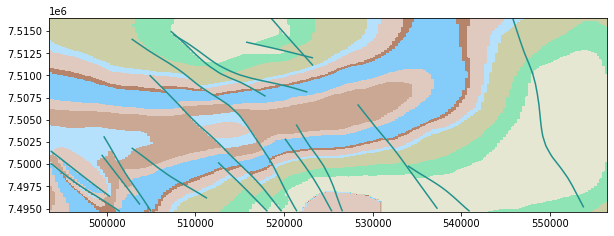

In [28]:
mapview = MapView(model)
mapview.nsteps = (200,200)
mapview.add_faults()
mapview.add_model()
# mapview.add_data(model.get_feature_by_name('supergroup_0'),unfault=True,grad=False)